In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

In [47]:
resolutions = {
    480: '640x480',
    720: '1280x720',
    1080: '1920x1080',
    1944: '2592x1944',
}

datasets = []

def energy (time, power):
    return power * (time / 1000 / 3600);

for res in [480, 720, 1080, 1944]:
    for enc in ['png', 'jpeg', 'yuv']:
        dataset = pd.read_csv('img' + str(res) + enc + '.csv')
        time = dataset.time.max()
        
        dataset['energy'] = dataset.apply(lambda row: energy(time, row.power), axis=1)
        dataset['enc'] = enc
        dataset['res'] = resolutions[res]
        datasets.append(dataset)

In [48]:
master = pd.concat(datasets)

In [49]:
master.head()

,power,time,energy,enc,res
0,1.556,4,0.010971,png,640x480
1,1.546,24,0.010900,png,640x480
2,1.344,91,0.009476,png,640x480
3,1.462,156,0.010308,png,640x480
4,1.636,223,0.011535,png,640x480


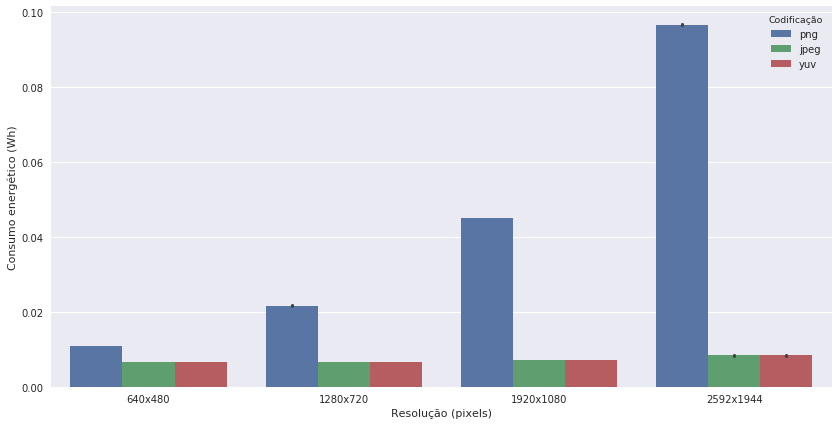

In [50]:
# plt.hist(df.power, bins=5, color=sns.desaturate("green", 1))
# sns.boxplot(df.power)
plt.figure(figsize=(14, 7))

plot = sns.barplot(data=master, hue='enc', x='res', y='energy')

# plot = sns.kdeplot(df.power, shade=True)
plot.set_xlabel('Resolução (pixels)')
plot.set_ylabel('Consumo energético (Wh)')
plot.legend_.set_title('Codificação')

# sns.violinplot(df.current)
# sns.kdeplot(df.power, df.current, cmap=sns.cubehelix_palette(light=1, as_cmap=True))